In [77]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pendulum

The class below trains the algorithm.

In [90]:
class Q_learning():
    def __init__(self, discrete_actions, discrete_theta, discrete_omega):

        self.discrete_theta = discrete_theta
        self.discrete_omega = discrete_omega
        self.action_list = discrete_actions
    
        # other parameters
        self.epsilon = 0.1
        self.gamma = 0.99
        self.lr = 0.1

        self.td_error = []
        self.loss = []

    def get_cost(self,x,u):
        theta = x[0]
        omega = x[1]
        cost = (theta-np.pi)**2+0.01*omega**2+0.0001*u**2
        return cost

    def index(self,x):
        in_x_0 = np.argmin(np.abs(self.discrete_theta - x[0]))
        in_x_1 = np.argmin(np.abs(self.discrete_omega - x[1]))
        return in_x_0, in_x_1 

    def get_policy_and_value_function(self, q_table):
        
        value_func = np.zeros([50,50])
        optimal_policy = np.zeros([50,50])

        for theta in range(50):
            for omega in range(50):
                value_func[theta, omega] = q_table[theta, omega, :].min()
                index = q_table[theta, omega, :].argmin()
                optimal_policy[theta,omega] = self.action_list[index]

        return value_func, optimal_policy 

    def training(self, q_table):

        for i in range(10000):

            x0 = np.array([0.,0.])
            loss = 0   
            error = 0         
            for j in range(100):
                # index of theta and                 
                in_x_theta, in_x_omega = self.index(x0) 

                if np.random.uniform() > self.epsilon:
                    action_index = (q_table[in_x_theta, in_x_omega, :]).argmin()
                else:
                    action_index = np.random.randint(0, len(self.action_list))
                
                # select the action
                action = self.action_list[action_index]
                
                # transition to next state
                x_next = pendulum.get_next_state(x0,action)

                # index for the next state
                ind_x_next_theta, ind_x_next_omega = self.index(x_next)
                
                # cost current state
                cost_current = self.get_cost(x0,action)
                
                # error
                delta_t = cost_current + self.gamma * q_table[ind_x_next_theta,ind_x_next_omega,:].min() - q_table[in_x_theta, in_x_omega,action_index]

                # update the q table
                q_table[in_x_theta, in_x_omega, action_index] = q_table[in_x_theta, in_x_omega, action_index] + self.lr*delta_t

                x0 = x_next
                
                loss = loss + abs(cost_current)
                error = delta_t + abs(delta_t)
            
            self.loss.append(loss)
            self.td_error.append(error)

            print(loss, 'Cost every episode')
            print(delta_t, 'td_error every episode')

        return q_table, self.loss, self.td_error

    def plot(self,t,x,u):
        # we can plot the results
        plt.figure()

        plt.subplot(2,1,1)
        plt.plot(t, x[0,:])
        plt.legend(['theta'])

        plt.subplot(2,1,2)
        plt.plot(t, x[1,:])
        plt.legend(['omega'])

        # we can also plot the control
        plt.figure()
        plt.plot(t[:-1], u.T)
        plt.legend(['u1'])
        plt.xlabel('Time [s]')

    def plot_value_and_policy(self, value_function, policy):
        # we plot the value function
        plt.figure(figsize=[6,6])
        plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
        plt.xlabel('Pendulum Angle')
        plt.ylabel('Velocity')
        plt.title('Value Function')

        # we plot the policy
        plt.figure(figsize=[6,6])
        plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
        plt.xlabel('Pendulum Angle')
        plt.ylabel('Velocity')
        plt.title('Policy')
        
    def plot_progress(self,loss,td_error):

        plt.figure(figsize=[10,10])

        time_steps = np.arange(start=0, stop=len(loss), step=1)
        
        kernel_size = 100
        kernel = np.ones(kernel_size) / kernel_size

        plt.subplot(2,1,1)
        plt.plot(loss)
        plt.legend(['cost/loss'])
        average_total_loss  = np.convolve(loss, kernel, mode='same')
        plt.plot(average_total_loss)
        plt.ylabel('cost value')
        plt.xlabel('episodes')

        plt.legend(['Average Cost'])

        plt.subplot(2,1,2)
        plt.plot(td_error)
        plt.legend(['Td error'])
        average_total_error  = np.convolve(td_error, kernel, mode='same')
        plt.plot(average_total_error)
        plt.ylabel('td error value')
        plt.xlabel('episodes')
        plt.legend(['Average Error']) 

Program to compute -  Q table , Loss , td_error
CASE - {-4,0,4}

In [ ]:
# number of theta
n_theta = 50

# number of omega
n_omega = 50

# number of actions
n_actions = 3

# maximum velocity
omega_max = pendulum.MAX_VELOCITY

action_list = np.array([-4,0,4])

# create lookup tables for discretized states

discrete_theta = np.linspace(0., 2*np.pi, n_theta, endpoint=False)
discrete_omega = np.linspace(-6, 6, n_omega)

# define q_table
q_table = np.zeros([n_theta, n_omega, len(action_list)])

learning = Q_learning(action_list, discrete_theta, discrete_omega)

q_table_updated, loss, td_error = learning.training(q_table)


SIMULATE and ANIMATE -  the pendulum 
PLOT -  the optimal policy and value function, learning progress (cost, td_error)

CASE - {-4,0,4}

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABhPW1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MTIgbG9v
a2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAKBWWI
hAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAzdiJ7g8K10PRXgACAgAFE5HmQp4K/g
AbPhU6RJh8T38MNwRklczQkE+BQepx/4wlXyCtuP/oLKMWMe5U5V6AmTjEf6TC6SD5Yx8MfY8O6W
0vAzIkVm7dTMpgFfg11CiIOVa4tlT7o+8AY4jVDbCZ1kbVbH3IxVozNbHY96Si7LsuGa6TG7Kk+b
TBEdRuzmtxG1v4piwgPuENZdF+yGa7+DH7cw0lkx8QuiGt0RBiN/I/CI+lN/LlG+kPMmAgfkpoyK
2KMUvfo8EvJLgw8N92kITFrY/FrQjev8KYfJ42us4p+CSMsRAkl5NVpJwJQkEiCTLeI0acClPK5u
0L8u84/FoTRIm2Pe89O+XtPO90FRegPWw7S4CX4HH3mev6Hh5076uPM6dDvszIoD63A6vc6b1vfB
ozzEperp8l4xmMa2sgbNLwzJBOT9Z3Cxa+sD7IZOyp3+uDlr7qXeTM/P/zcQwWPIs0FIr5fhGPBH
1DjQ+o7Z1kZqicJUiMM4Nryj3COU/eaLidifMnuoMScZwbi0EJ7uGFDviTUfrwvekn6lqxe/yc2S
AAADAhQAEfjyNwbUjKVCKC+K1+a0VguYXlqA/C0d27/fpFbn/I8NFxldKxL49cVM0G69FdmNkfq7
Sbkme0+ggS+5m1LChFltigvMbvGeaLWGiQ0FBiq+PbK7N81FfbEhduRPBhC9C0pBnXjtZOvHquiW
jGHRpgcDoMLxtIIx1nRij0nbbb7KoqRPSBJ9yTIVH8Rc8e/TUkzGdxiaZ6Du0LCTfT8vddmx0Npk
/d6sk6xoIr4h+NOtiqFzJObsJ4pe5k/5JWCdgw64stnz8rDGtXpGU9ldMv/z48EX0qjUJ5d/1Z7T
x+zJgAAAAwAAAwAKdkz05q4clIuEUQhJlC7CEWbCLg402KsAvD0KX+7GjqgECdSkWYje09T/8AH2
X82GDZSJOt6tvS5PkY3vlV8kEo5DIkLS/f1IlJjeaNnNP/2vH/l1vaE5dEn8cGXysozxJEQBRngm
ChWqrKehnmP5zq2W/ADDcrkivT7/XFrzNsMSXnjh5dSjcp2nfPbg/QEtW9DA3sIcidvsLebJ5Y9l
bo+OzNQfFx3lUN2Kt8KikeG5JX763F8Dk/cGmRUC11L8ZSjZXTEKp/spSAMhMuDK/4QI1QUHHxr1
N0p31V9pWuxaNaM1iljVfsPt7VLqG5bNPsYdyNHNJgPXhBjXhS31JfwFyK8PnOz8+P++j3CQOInt
rgTuqxXSu3UEny5E5vPCNTY4Dt7FOu/6y8+qU52lnnXLxjsgiwAAAwCokJvuJ42eUsAcxGTvjKyw
Lj1RIeXzFJ5pabLh//oxI87BeBJtnwy0IgukNbX94xfzejOOnwzJngPTiUomIZLExeCD/MmGUam2
5HyA1odgzmYOtswno5YYOkSeNatwdFHpEvgbtT7/3hbIj2X4tUjRom5tjY6KcJCebubnsGbvj7yp
v5s4OfgaGkfm4C0E1zzJVjjdKLSWEPanuu0ycBk+SNKuJLkyd1b2PFJ1ueHehysiK7Z2m5zqAuhL
u6RwE/TUVsc3FWRiR29EC/n2QRno+BlkfegvytqpBZhXfk6kSAff1sQCgRgq/lhq+jnF718q20HR
GaqTLemuPI9/O+Jhsn/RQb7H70zi//CC6LHeV51henva53YhsQxmiOwbLcw+rkQJRwCCdzJl8oaT
JA/96cWdeBdR9+nf2i+AC0bGAAADAABM3VESFPc0pL9i7oMMkIokw9byN7xlAticnHj5/4y6zZDW
DWxbMpQZw/svHhDG2TpXViM7HocOLi2VImYmLGlc8/9ZezyazVGbKXhxyL4HMNS078cjjfrb+lkh
OcjV8UTn6alRg7h7O7lizm9p8lxLveKiJkBXIkbySFeTE5nvWqPuLqDITXgqdNITga7C2UywVnts
b4Qk5XohrZnqgKeEeamY+T7VSiBB//+2m3wF2UklatSpcnSKUcJaOFEynINrtlvBo2OlTZDRNrfc
FhkH0NMs/M9Ab2aHJ4WT+6VXpG/d5x93RQzo//90QliBBbeIP3Z4CyPkaXFyfbFlbblskRMNWptU
cfZMm2MAZ9+/ucgU7t5HO7IX+hYxYYW5eDh8a8qqr2Z7pB2mpjOzPElnoPOv1DqGgxIQiR+3MSHn
2bng0LBJF0kU4W68323LHAwuo/8FUiwABIQVDKvgfqE9WAi2rAeMvtcHOy/OtAIWdU0ymz1PSXNF
b/Oi0O89GBAMFD3xJg1y1UZipzoRnDrfcFAP2yTXLg6hWdMY+9oXv8ahjoCpCaLgzOuKMm7Exvft
tZVmJOy5fRRZntyGFwR/Hj5M1zilgIqCNtBCqxAijDXt8/ACzPWFzO+UgQP0KcOHV5Kok/1wv+hu
8jjski5yVyPHcfjZY4u1KOFhfEx/CpBw6vJVEn09h/V6YDUMizuROdLL+2KvIjG7DJFn9p/VqdsA
0IGJx4KxOXFT1WpdHFWS7fcMRF6M7sLyLCoGJwFegaW30+L9RN2CBojNKS0v1NlTyjuenBacmKj7
ajm5XQ6aIz7e32w3ZV7IC5PYo06nT1qYjrs14WzgGJsaKMqZGthzgdsNfJqbjysWtbgDWoxt3TXG
YBIUuVnMVCF7b3IrtNgAhr84r4G+D1LzNhob+CJsNQOn6dWOfiF1V7KQDNkVdUBEruLnIyx1fshK
ohbvYyRxYBbxYrcjP2A2aik1OVwFV1Lq3EVxH8V+Zzqcq1WxakOYzeLNpwjYrvHQtshgLWRLwJPg
1hul5KDWccaSO8xh06ZjZqC/j9fVKvlIE8y5s7WiRVJBljvyOQZUJinF93SXGv+DagJTLEsFO5xH
DYjzkvJ+b/HGhX8kXdsPN

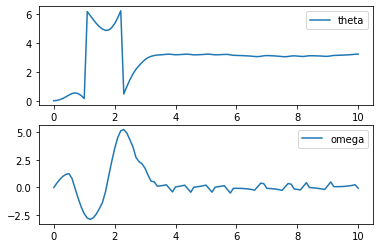

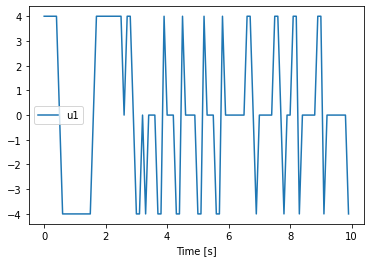

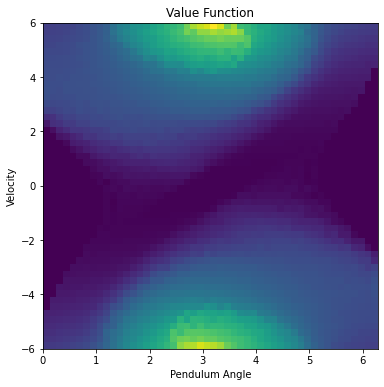

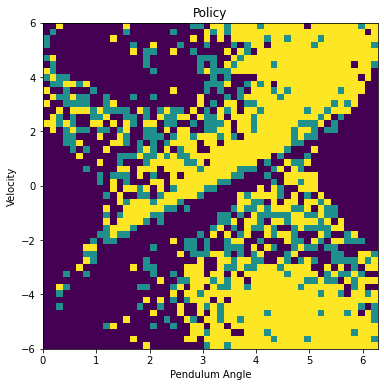

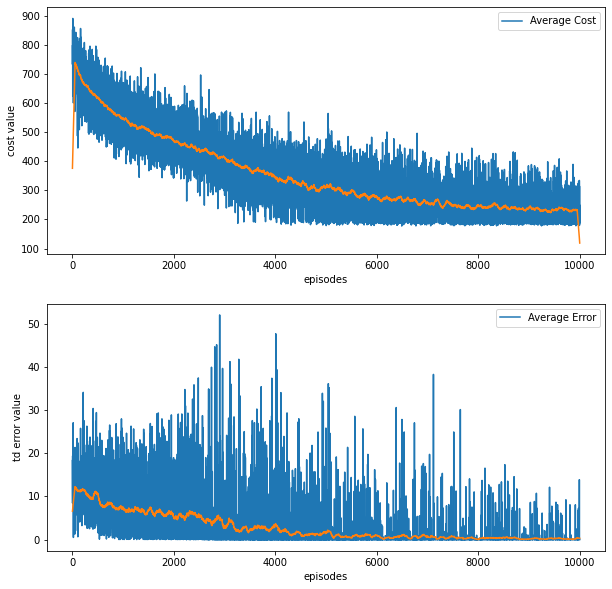

In [92]:
#learning.main(q_table_updated)
def dummy_controller(x):
    """
        the prototype of a controller is as follows
        x is a column vector containing the state of the robot
        
        this controller needs to return a scalar
        you may want to modify this controller to use the policy table to compute control output
    """
    ind_theta, ind_omega = learning.index(x)
    a_ind = q_table_updated[ind_theta, ind_omega, :].argmin()
    a = action_list[a_ind]
    return a

T = 10.
x0 = np.array([0,0])

# simulate
t, x, u = pendulum.simulate(x0, dummy_controller, T)

# get the optimal policy and value function
value_func, policy = learning.get_policy_and_value_function(q_table_updated)

#animate the robot
pendulum.animate_robot(x)

# plot theta, omega, action, policy, value function, td_error, cost
learning.plot(t,x,u)
learning.plot_value_and_policy(value_func, policy)
learning.plot_progress(loss, td_error)

PROGRAM TO COMPUTE -  Q table , Loss , td_error
CASE - {-5,0,5}

In [ ]:
# number of theta
n_theta = 50

# number of omega
n_omega = 50

# number of actions
n_actions = 3

# maximum velocity
omega_max = pendulum.MAX_VELOCITY

action_list = np.array([-5,0,5])

# create lookup tables for discretized states

discrete_theta = np.linspace(0., 2*np.pi, n_theta, endpoint=False)
discrete_omega = np.linspace(-6, 6, n_omega)

# define q_table
q_table = np.zeros([n_theta, n_omega, len(action_list)])

learning = Q_learning(action_list, discrete_theta, discrete_omega)

q_table_updated_1, loss_1, td_error_1 = learning.training(q_table)

SIMULATE and ANIMATE -  the pendulum 
PLOT -  the optimal policy and value function, learning progress (cost, td_error)

CASE - {-5,0,5}

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABcNG1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MTIgbG9v
a2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAKT2WI
hAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAzdiJ7g8K10PRXgACAgAFE5HmQp4K/g
AbPhU6RJh8T38MNwRklczQkE+BQepx/4wlXyCtuP/oJ1ou99S7EFSvF5cHyxj4Y+yFolMCCg1ulP
uqtrNWjAXUVvFCUQxFmc5oihzjuTlBjiNUNmb08D+s+mbhJEuVfAUaWOIeenl2zzFt/VX3uYIu2K
6I1weYMTpnmsCy/hk4l6lxfQBxP2wBKdfGQHWVSelSuw8PIy7AiM5RvAC5ui11X0M4VwgtTucvoB
Qn3mXAlhNVKhi1sfi1oKcf7XwwVApqCSHtckZYiBJLyatvyt084fsJonxKl6nFKeVzdoX5ei/9NL
+NQnKAUkdJ+EQf4ouka1TzSR+aQl+Bx95nr+h4edPqbjzOnQ77MyKA+twl5KP6v334A7NV2FaH0+
S8YzGNbWQN3UZnWmsfhDqky+zEoPlOVO/12ufzJ/Q3+amqhazBmqC5I6sVkvr40jNc8js8m6WeJs
C7puLdGjGkVCqd8R9RLeA55/9GWdZ6gWpWEizjSMJMP6C6apQwwlL1GEoFQd0LHHa2hfLO8t5doO
NvDNYv3OFoVJm6o/xH4Uy63uj0n8cYQ6Ui/2ejNf0Xnzx7gP/+RdG4am5nWDwzpnT4NmG7HGNKxK
q4JLlt6DTKskr8vqrS1uspG+/l0mp29OehFltf59r3eM80WsNEhoKOFZ8e2V2b5qK+2JC8RPUF6w
obqLZMZ6GIAV44szH7h0aYHA6DC8bSCMeIf5esk0R3IoBmd31oAQ00JBI0KfB8Xbomu8XusgY5+P
mcDtGmNnmjKIPUd0muGrw8+GWQnWN0Im0v5PGQEiNI6h4Cj/8M6n7ire4zY3D5FULPOtlRCG1d7H
CWAchRLDNSkgo5LZW2JDEBf90NqqKwlyxEvaeNQAALYAAAMAOVHG+mOcvkh2TpVX4iroZ/ehUwKj
ijmnWhw3arsfBCGRATBT3Q2pkv1/r/ZCMnPrj1UOPMdmekPlz55CDFfAdSqVkHAl7Qb9+EhedzFV
SD7MP4/8urSlmjsE/jgy+VlGeJ/d6Lc5AMuuurTcWjEw/nY8pb8AMNyuSGtP+uEPN9AlB18gJ2lD
KmIfwHbiwXTEOrV3Ll8IQ5E7fYW82Tyx7K3ZaOywD8XXQ197wE94Vm2esckr99bm2BefqKOPOkU6
Uj/xQ6CN4WIqanpn+j0Z09A5dXK+MyofiMO8X0prGaAY7HVyCnUZn1hIsnopzfsgB/M7VwNeV3Zz
CTg7OxErn0vv473bCeVpoH7MzxdOO4PSprL3sbghTZqO6PUvdwLT/p6ARaafyQ/CMzOx3umm/XtY
k/22wx1I3duwE38vuLQ1p0nDM7YPJZA1M/aa8QDQKcVhFoADrH4Stvu5aSHhnj83zxehKD2and//
90rbrVyV/wF1gTyftL/Z/QEyU8xT9HwuGZM8B6cSlExCD4AMIcxQ9BhBoQFXDh6YCWBnYWJxP0jv
5A5uP9qdw858UekS+Bu1Pv/eGal6/xZMuSy87ONBXBThITzdzc9gzd8gFtN/NnBz8DQ0j9De2fCJ
COoscbpZ9lse8kEd2mTgMoY/1yTE9rNKG2H+PJ/tqUBCRNz/Y8LMH6gLj6bjOOAn6aitjm4qyO6+
kogX8+yCM9HwMtrUljnqACgMQWCrDkDc2T2oyClonjZucMzbbnO5EgrsPeZ17zDRSGXN+0uMCyBo
zWcbV/ybqHUmHob//ULtlJTMxEKWPjEVVquKHzYtSiJYuaFkQEGaK68tYInIh6Ewal1Vd9IAfgKF
1iEdwLjAE98rxBARvxn/xZemCcZ1CgAAAwPcAAADABrdnx3Y6w4ZPHNh1TC0P/q9NEg0/7s1hUQx
YoiEb3tZ22dd+0pxtUMKvbYL9he3M9k00QJld01BlXPsMuLKPwj+U/wvAtejHj8RU1gE3PkTXCeD
I0j7N8Cy9VfbX3puubqqec3tL0Ret7bsESaRlP7noPuyYnM961R9xdQYFOgC8mChCpqq8/iouRnk
a7cSTleiGtmeqAp4R4Ducjcp2QroEfWGyH8QL/Lk3HQKhfs4P2/+7khE0vTk4FUMbdxTfREGtoM0
GqT2dPM9Ab2ZPFfbf+6VXpG/d0Q7s0yZJ//+QWlUGeMJMN/J4CyPkaXFyfbFlbbk803zNBkgn59S
zHe19Kf37BwIpdsGpGW5lUlzhPZbfG/5D/JXJv6gC2+m07PYFrtqlxUmlHNIY2zdpKEAOViUKmGQ
T7b7vRObB3su2Lq5bBiBfLDPYUcIpQPoIKjsLCc5G81dbAqCpPv1xjFMelbFA5WOe6Th72yZIe5+
Ifl9340eP9alLn2FYvv0CTDmdcUcSV8e/H13iotUL4UUq9QV0fyizPQtsL2jR0BUhNFwZnXFGHeo
0qbiANOfCVfClLUrM9uQw0fumlCVCaLgzOuKKk1oz+kQwLWvb5+AFmesLmdV8IRmbPySkvspH8ut
w7Bx4Z49/vbcZi9w9vZGLscXalHBcVrZ/CpBw6vJVEoF9RP4DMuWp2hx/2D9+KZFgJBMo2j6b/eg
9NUclmfTxBHcGXoGXeQPbLWPGGV4p7Ajrtpn1wjVrHaz8lV5uA4YFosX4Y6Fsh6NT0o2FL5taR75
hzLrHM7I6LweC3nKMVof+ACeioW+mX3uhp8RqckSc7ZgRj33LEN7xLNf9JeVMi7SSz7NJh+l4kd3
6vVeqBkFSW1aNqK3UcJ6oE/ig9YYbXSHniSxnQBaqy8+6ao/dtPs2Iqpr103auzs8F596ysXuZ+u
4ucjLHV9I42sqzHzOwDAOQrLluVhodQ9nc6StbvSUdBtH6KS8QsnOpx4c2LUhzGbxZtOEbtd46Ft
kMBayJbrVZGAFXX4CVIHE

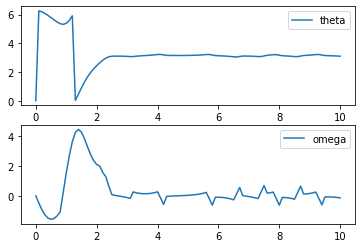

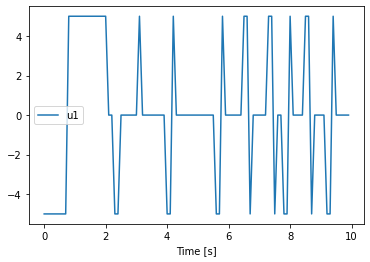

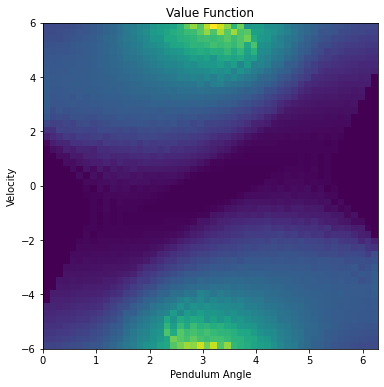

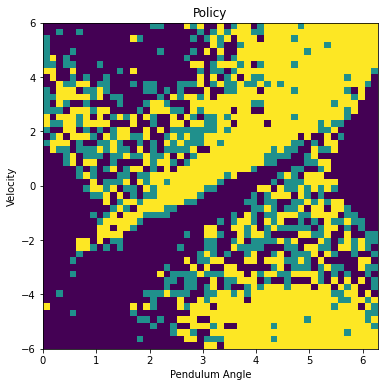

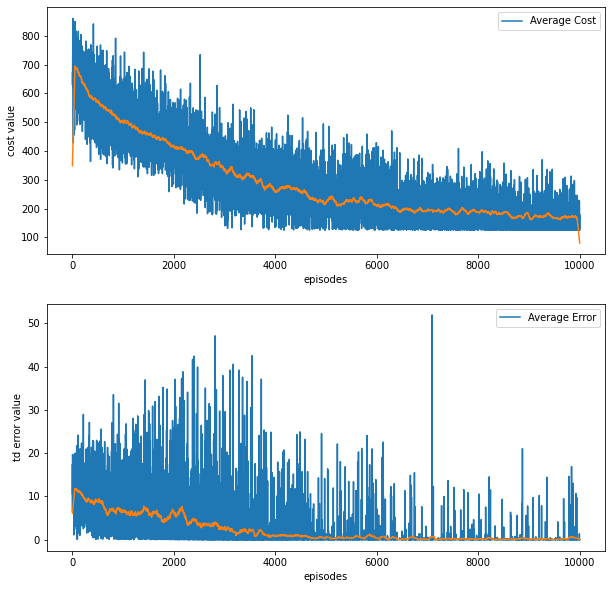

In [94]:
#learning.main(q_table_updated)
def dummy_controller(x):
    """
        the prototype of a controller is as follows
        x is a column vector containing the state of the robot
        
        this controller needs to return a scalar
        you may want to modify this controller to use the policy table to compute control output
    """
    ind_theta, ind_omega = learning.index(x)
    a_ind = q_table_updated_1[ind_theta, ind_omega, :].argmin()
    a = action_list[a_ind]
    return a

T = 10.
x0 = np.array([0,0])
t, x, u = pendulum.simulate(x0, dummy_controller, T)
value_func, policy = learning.get_policy_and_value_function(q_table_updated_1)

#animate the robot
pendulum.animate_robot(x)

# plot theta, omega, action, policy, value function, td_error, cost
learning.plot(t,x,u)
learning.plot_value_and_policy(value_func, policy)
learning.plot_progress(loss_1, td_error_1)